In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # 0.11.2

import cv2 # apt-get install libgl1-mesa-glx 설치로 cv2 문제 해결
import os
data_dir = os.listdir("../input/data")

#### 경로 설정

In [2]:
# Train Dataset 경로
train_dir = '/opt/ml/input/data/train'

# meta 데이터와 이미지 경로를 불러옵니다. (테스트 데이터의 )
train_df = pd.read_csv(os.path.join(train_dir, 'train.csv'))
image_dir = os.path.join(train_dir, 'images')

image_paths = [os.path.join(image_dir, img_path) for img_path in train_df.path]

#### 이미지 파일 출력

## data_label
![](data_label.JPG)

## Label 요약표
### mask: Wear,Incor,No
### gender: M, F
### age: Y,M,O
#### ex) label 0 = Wear_M_Y

In [3]:
test_ls = [19.0952, 13.1111, 12.6667, 11.6190, 9.6984, 5.0794, 3.7937, 2.6508, 2.5873, 
           2.2857, 1.9048, 1.2857, 3.9048, 2.3810, 2.5556, 2.3046, 2.0159, 1.0635]
test_df=pd.DataFrame({'test_dist':test_ls})
test_df.reset_index(inplace=True)

In [4]:
test_df.columns = ['label', 'label_dist']

In [5]:
test_df['label*126'] = test_df['label_dist']*126

In [6]:
test_df['label*126'].sum()

12600.403199999999

## Evaluation Data Distribution

In [7]:
def func(data):
    mask_label = (data // 6) % 3
    gender_label = (data // 3) % 2
    age_label = data % 3
    
    mask = ["Wear", "Incor", "No"]
    gender = ["M","F"]
    age = ["Y", "M", "O"]
    return f"{mask[mask_label]}_{gender[gender_label]}_{age[age_label]} "

test_df['label_describe'] = test_df['label'].apply(func)

Text(0.5, 1.0, 'eval_data_distribution')

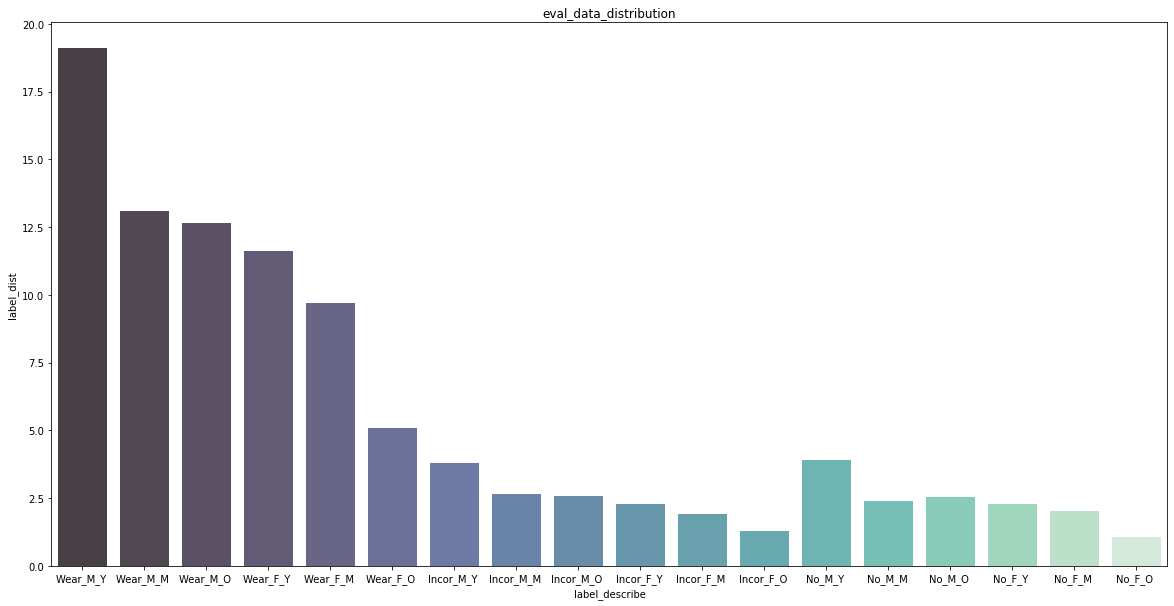

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
sns.barplot(x='label_describe', y='label_dist', data=test_df, palette='mako', ax=ax, alpha=0.8)
ax.set_title("eval_data_distribution")

## Final Test

(0.0, 2500.0)

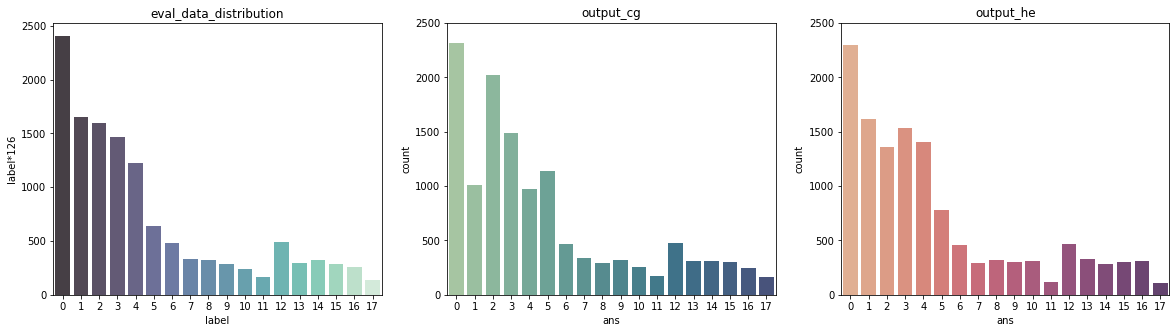

In [59]:
output_dir = '/opt/ml/level1-image-classification-level1-nlp-10/output'
output_df = pd.read_csv(os.path.join(output_dir, 'output_cg.csv')) # csv파일만 변경하면 됩니다.
output_df2 = pd.read_csv(os.path.join(output_dir, 'output_he.csv')) # csv파일만 변경하면 됩니다.

fig, ax = plt.subplots(1, 3, figsize=(20, 5))
sns.barplot(x='label', y='label*126', data=test_df, palette='mako', ax=ax[0], alpha=0.8)
ax[0].set_title("eval_data_distribution")
sns.countplot(x='ans', data=output_df, palette='crest', ax=ax[1], alpha=0.9)
ax[1].set_title("output_cg")
ax[1].set_ylim(0, 2500)
sns.countplot(x='ans', data=output_df2, palette='flare', ax=ax[2], alpha=0.9)
ax[2].set_title("output_he")
ax[2].set_ylim(0, 2500)

## Stacked histogram

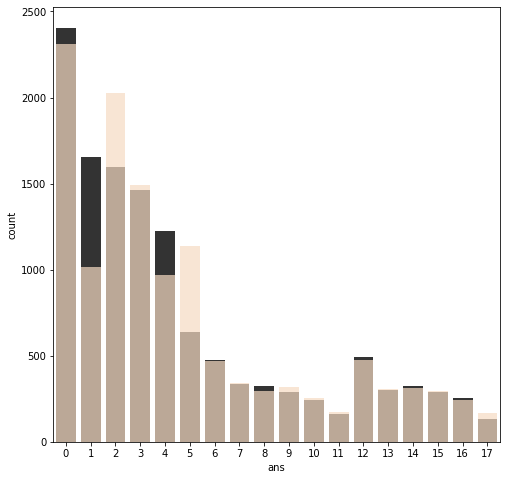

In [66]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
sns.barplot(x='label', y='label*126', data=test_df, color='black', ax=ax, alpha=0.8)
sns.countplot(x='ans', data=output_df, color='peachpuff', ax=ax, alpha=0.7)
# sns.countplot(x='ans', data=output_df2, palette='crest', ax=ax, alpha=0.9)

## EDA아이디어
### 다음과 같이 Age 분포를 설정하면 어떨까?
- 30세와 60세의 나이 분포를 5살씩만 앞으로 당기면 데이터 불균형 문제를 해소할 수 있을 것으로 보여진다. 

In [14]:
### pd.cut이용
train_df['age_dist_origin'] =pd.cut(train_df.age, bins=[18, 30, 59, 60], labels=["30<age", "30<=age<60", "age>=60"])
train_df['age_dist_modify'] =pd.cut(train_df.age, bins=[18, 25, 54, 61], labels=["25<age", "25<=age<54", "age>=54"])
train_df['age_dist_modify2'] =pd.cut(train_df.age, bins=[18, 30, 54, 61], labels=["30<age", "30<=age<54", "age>=54"])

In [15]:
train_df['age_dist_modify'].head()

0    25<=age<54
1    25<=age<54
2    25<=age<54
3       age>=54
4       age>=54
Name: age_dist_modify, dtype: category
Categories (3, object): ['25<age' < '25<=age<54' < 'age>=54']

Text(0.5, 1.0, 'age_dist(25~55~60)')

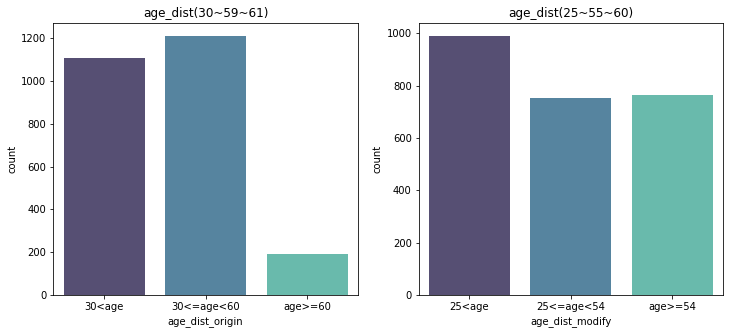

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(x='age_dist_origin', data=train_df, palette='mako', ax=ax[0], alpha=0.9)
ax[0].set_title("age_dist(30~59~61)")

sns.countplot(x='age_dist_modify', data=train_df, palette='mako', ax=ax[1], alpha=0.9)
ax[1].set_title("age_dist(25~55~60)")

Text(0.5, 1.0, 'age_dist(25~55~60)')

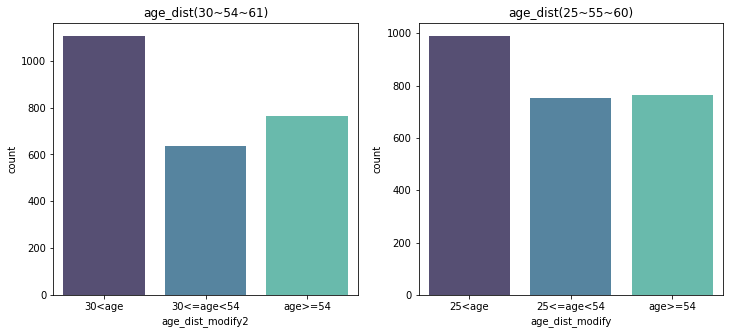

In [17]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(x='age_dist_modify2', data=train_df, palette='mako', ax=ax[0], alpha=0.9)
ax[0].set_title("age_dist(30~54~61)")

sns.countplot(x='age_dist_modify', data=train_df, palette='mako', ax=ax[1], alpha=0.9)
ax[1].set_title("age_dist(25~55~60)")

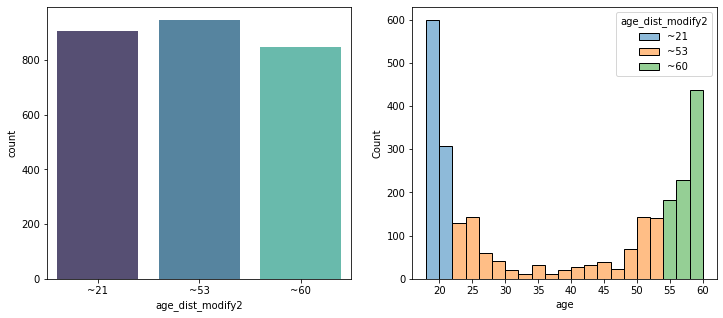

In [18]:
## 개수로 나눴을 때는 다음과 같이 나눠진다.

train_df['age_dist_modify2'] =pd.qcut(train_df.age, 3, labels=["~21", "~53", "~60"])

fig, ax = plt.subplots(1, 2, figsize=(12, 5))
sns.countplot(x='age_dist_modify2', data=train_df, palette='mako', ax=ax[0], alpha=0.9)
# ax[0].set_title("age_dist(30~59~61)")

g = sns.histplot(train_df, x='age', hue='age_dist_modify2', ax=ax[1], binwidth=2)
g.set_xticks(range(20,61,5))